# 앤스콤 데이터 집합 불러오기

데이터 시각화의 중요성을 보여주는 대표적인 사례가 앤스콘 4분할 그래프  
영국의 Frank Anscombe 이 데이터를 시각화하지 않고 수치만 확인할때 발생할 수 있는 문제점을 보여주기 위해 만든 데이터와 그래프  

앤스콤 4분할 그래프를 구성하는 데이터 집합은 총 4개의 그룹이며, 모든 데이터는 x,y열을 가지고 있음.  
but, 4개의 그룹은 각각 **평균, 분산, 회귀선, 상관관계**가 모두 같다는 특징이 있음

> **따라서, 4개의 그룹의 데이터는 모두 같을 것이다!**

라는 착각에 빠질 수 있는데, 이것이 앤스콤이 지적한 함정  

하지만 데이터를 시각화 해보면 각 그룹이 서로 다른 데이터라는 것을 한눈에 알 수 있음.  
이러한 점에서 데이터 시각화는 데이터 분석 분야에서 아주 중요한 요소 

In [1]:
import pandas as pd 
import seaborn as sns

앤스콤 데이터 셋은 seaborn 의 라이브러리에 포함되어 있음

In [4]:
# seaborn 의 load_dataset 매서드를 통해 불러올 수 있음
anscombe = sns.load_dataset('anscombe')
print(type(anscombe))
anscombe.head()

<class 'pandas.core.frame.DataFrame'>


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


'dataset' column에 그룹이 나누어져 있는 것을 확인할 수 있음

In [7]:
anscombe['dataset'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

# matplotlib 라이브러리로 간단한 그래프 그리기

그래프를 그리기 위해 matplotlib 라이브러리 호출  
matplotlib 라이브러리는 plt 라는 별칭을 주로 사용  

%matplotlib inline 의 역할은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 도와주는 코드 

In [20]:
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt

dataset 이 'I' 인 데이터 만 추출, 첫번째 그룹만 추출

In [11]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_1.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


plot 매서드로 line plot을 그릴 수 있음, 인자값으로 각각 x,y값을 전달

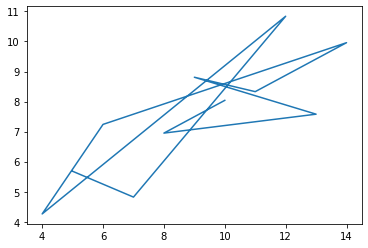

In [21]:
plt.plot(dataset_1['x'], dataset_1['y'])

plot 메서드는 line 이 기본값, 점으로 표현하려면 'o'인자 값을 추가 

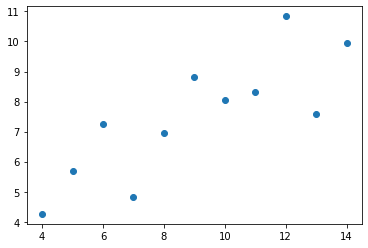

In [22]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

# 한 번에 4개의 그래프 그리기

1. 전체 그래프가 위치할 기본 틀을 만듦  
fig = plt.figure()  
2. 그래프를 그려넣을 그래프 격자를 만듦   
axes = fig.add_subplot()  
3. 격자에 그래프를 하나씩 추가, 격자에 그래프가 추가되는 순서는 왼쪽 -> 오른쪽   
axes.plot()  
* 만약 격자의 첫번째 행이 꽉차면 두 번째 행에 그래프를 그림

* 그래프 격자에 제목추가  
axes.set_title()
* 기본 틀 제목 추가  
fig.suptitle()

In [30]:
# 그룹별로 변수에 추가 
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

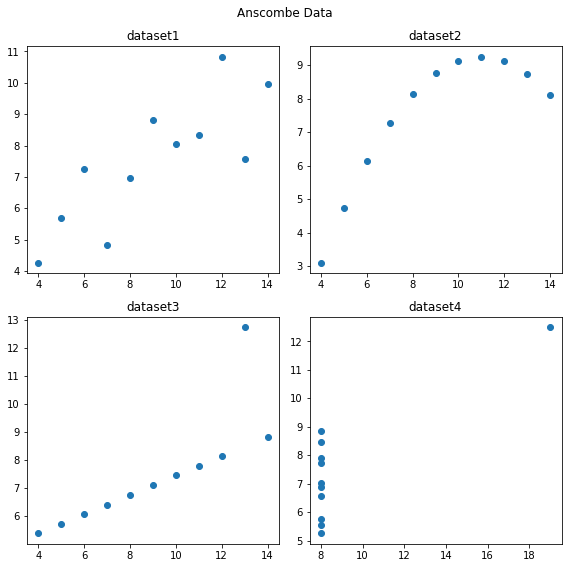

In [38]:
# 1. 전체 그래프가 위치할 기본 틀을 만듦
fig = plt.figure(figsize=(8, 8))

# 2. 그래프를 그려넣을 그래프 격자를 만듦
# add_subplot(nrows, ncols, index, **kwargs)
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

# 3. 격자에 그래프를 하나씩 추가, 격자에 그래프가 추가되는 순서는 왼쪽 -> 오른쪽
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

# 그래프 격자에 제목 추가 
axes1.set_title('dataset1')
axes2.set_title('dataset2')
axes3.set_title('dataset3')
axes4.set_title('dataset4')

# 기본 틀(fig) 제목 추가
fig.suptitle('Anscombe Data')

# 그래프 격자 레이아웃 조절
fig.tight_layout()

# 보여주기
plt.show()

# 기초 그래프 그리기 - 히스토그램, 산점도, 박스 그래프

matplotlib의 다양한 메서드를 확인하고, 다양한 그래프가 있는 seaborn 라이브러리 살펴보기

seaborn 라이브러리의 tips 데이터 셋 활용  
식당에서 팁을 지불한 손님의 정보를 모아둔 데이터셋 

In [39]:
tips = sns.load_dataset('tips')
print(type(tips))
tips.head()

<class 'pandas.core.frame.DataFrame'>


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


총 금액, 팁, 성별, 흡연여부, 요일, 식사시간대, 인원 정보를 담고 있는 columns 가 있음

In [42]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

## 히스토그램 - 단(일)변량 그래프
히스토그램은 데이터프레임의 변수의 **데이터 분포와 빈도를 살펴보는 용도**로 주로 사용

bins : array  
    The edges of the bins. Length nbins + 1 (nbins left edges and right  
    edge of last bin).  Always a single array even when multiple data  
    sets are passed in.  

In [50]:
tips['total_bill'].max()

50.81

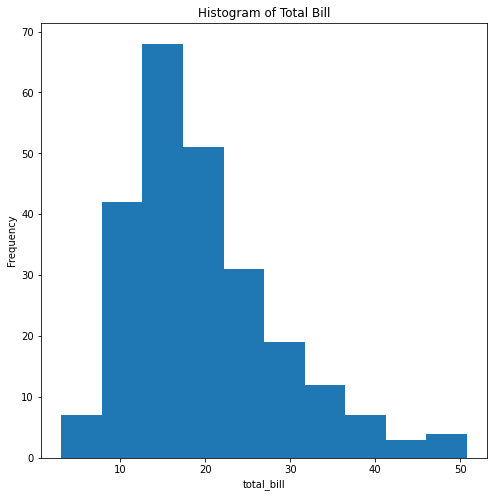

In [49]:
fig = plt.figure(figsize=(8, 8))
axes1 = fig.add_subplot(1, 1, 1)

# bins 인자로 표현할 그래프의 개수를 설정 가능
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('total_bill')
axes1.set_ylabel('Frequency')

plt.show()

## 산점도 - 이변량 그래프
산점도 그래프는 변수를 2개 사용, 데이터 분포 나타내는데 주로 사용, 데이터를 분포를 파악하기가 용이함

scatter(x, y, marker=) 등등 다양한 인자값 추가, 마커, 색상 등 변경가능

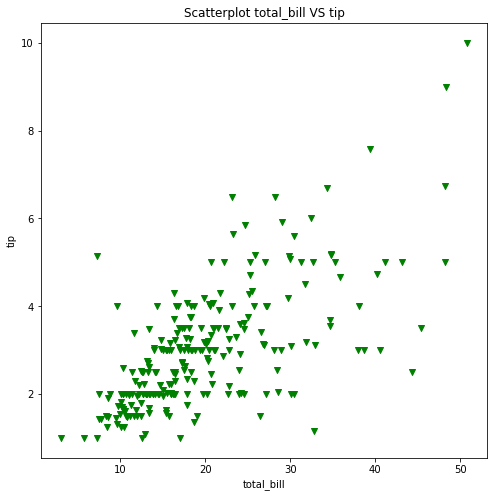

In [60]:
fig = plt.figure(figsize=(8,8))

axes = fig.add_subplot(1, 1, 1)
axes.scatter(tips['total_bill'], tips['tip'], marker='v', color='green')

axes.set_title('Scatterplot total_bill VS tip')
axes.set_xlabel('total_bill')
axes.set_ylabel('tip')

plt.show()

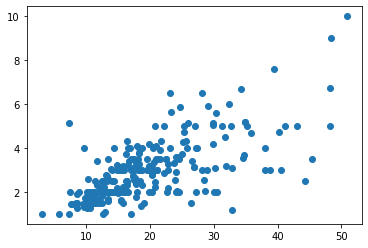

In [61]:
plt.scatter(tips['total_bill'], tips['tip'])

## 박스그래프 - 이변량 그래프
이산형 변수(범주형 변수) + 연속형 변수 를 함께 사용되는 그래프
> 이산형, 범주형 변수란 수학적 연산의 개념이 없이 범주로서 구분되는 변수 (Female : 0, Male :1)  
이들은 값을 구분하기 위한 목적의 변수일 뿐 연산의 의미를 갖지 않는 다는 특성이 있음  
0(Female) + 1(Male) != 1(Male)

> 연속형 변수란 수학적 연산이 적용되는 변수로 연속성을 가지는 변수 (가격, 온도)  
5000원 + 2000원 = 7000원

In [79]:
# sex에 따라 구별된 df을 각각 female, male 변수에 담음
female = tips[tips['sex'] == 'Female']['tip']
male = tips[tips['sex'] == 'Male']['tip']
print(type(male))
print(male)

<class 'pandas.core.series.Series'>
1      1.66
2      3.50
3      3.31
5      4.71
6      2.00
       ... 
236    1.00
237    1.17
239    5.92
241    2.00
242    1.75
Name: tip, Length: 157, dtype: float64


Boxplot(x)  
x : Array or a sequence of vectors. The input data.

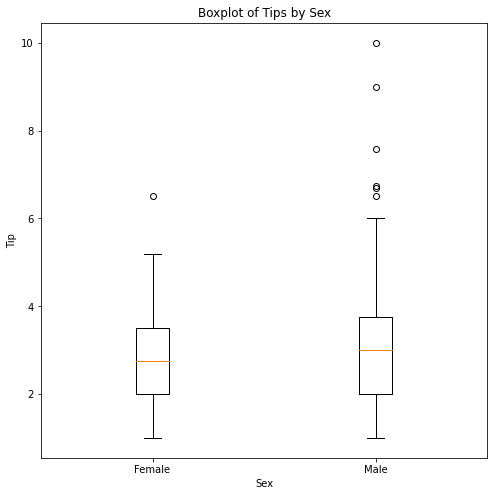

In [80]:
fig = plt.figure(figsize=(8, 8))
axes = fig.add_subplot(1, 1, 1)

axes.boxplot([female, male],
            labels=['Female', 'Male'])
axes.set_xlabel('Sex')
axes.set_ylabel('Tip')
axes.set_title('Boxplot of Tips by Sex')

plt.show()

## 산점도 - 다변량 그래프
3개 이상의 변수를 사용한 그래프를 다변량 그래프라고 함.   
지불금액과 팁, 그리고 성별에 따른 차이를 알고 싶을때 점의 색상을 다르게 한다던가, 투명도를 조절하는 방식으로 표현할 수 있음

산점도 그래프에 성별 변수를 추가  
성별변수는 문자열 -> 색상지정이 불가능 -> 정수로 변환해주어야함, 원핫인코딩 방식

In [84]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [85]:
# apply 함수를 이용하여 Female:0, Male:1 의 정수로 치환
tips['sex_color'] = tips['sex'].apply(lambda x: 0 if x=='Female' else 1)

In [86]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


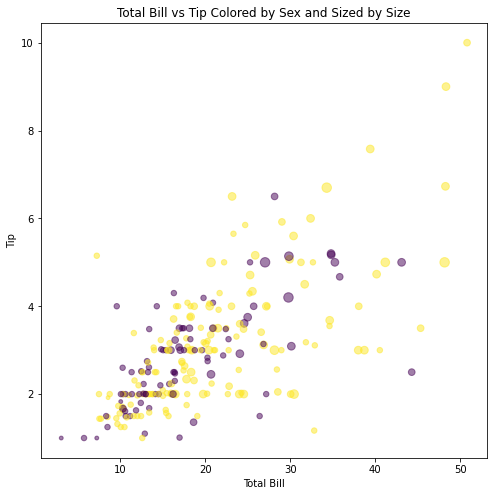

In [90]:
fig = plt.figure(figsize=(8, 8))
axes = fig.add_subplot(1, 1, 1)
axes.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size'] * 15,
    c=tips['sex_color'],
    alpha=0.5
)

axes.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes.set_xlabel('Total Bill')
axes.set_ylabel('Tip')

plt.show()

# seaborn 단변량 그래프 그리기
이전에는 matplotlib를 활용하여 그래프를 그렸지만  
seaborn을 활용하여 다양하고 화려한 그래프를 그려봄

In [92]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## seaborn 히스토그램
seaborn 에서 히스토그램을 그리려면 subplots, ~~distplot~~ 매서드를 활용  
distplot 은 seaborn 에서 지원중단된 기능임, histplot 이나 displot 을 사용하라고 안내하고 있음

[distplot seaborn 공식문서](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot)

>This function is **deprecated and will be removed** in a future version. Please adapt your code to use one of two new functions:  
> * **displot()** : a figure-level function with a similar flexibility over the kind of plot to draw  
> * **histplot()** : an axes-level function for plotting histograms, including with kernel density smoothing  

histplot 으로 그래프를 작성

* stat 인자 값으로 y 축 label 을 지정할 수 있음 지원하는 값은 4개
stat{“count”, “frequency”, “density”, “probability”}  
Aggregate statistic to compute in each bin.  
count shows the number of observations  
frequency shows the number of observations divided by the bin width  
density normalizes counts so that the area of the histogram is 1  
probability normalizes counts so that the sum of the bar heights is 1

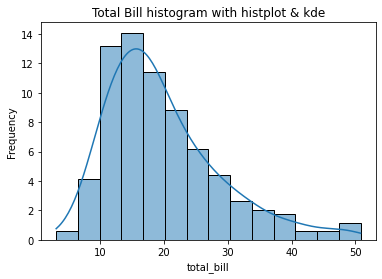

In [114]:
ax = plt.subplots()
ax = sns.histplot(data=tips, x=tips['total_bill'], kde=True, stat='frequency')
ax.set_title('Total Bill histogram with histplot & kde')
plt.show()

밀집도 그래프만 나타내려면 displot 를 사용

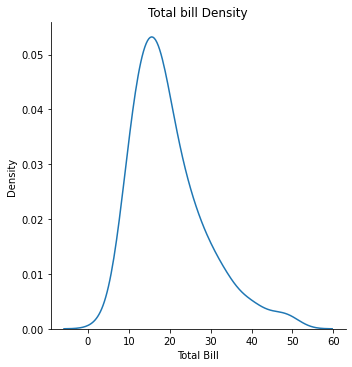

In [116]:
ax = sns.displot(data=tips, x=tips['total_bill'], kind='kde')
plt.title('Total bill Density')
plt.xlabel('Total Bill')
plt.ylabel('Density')
plt.show()


rug 그래프 추가

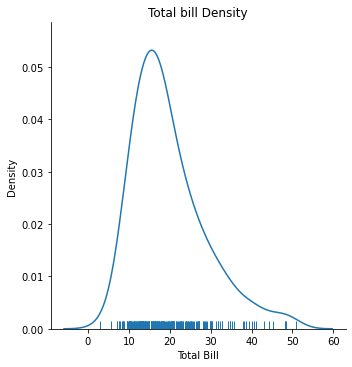

In [117]:
ax = sns.displot(data=tips, x=tips['total_bill'], kind='kde', rug=True)
plt.title('Total bill Density')
plt.xlabel('Total Bill')
plt.ylabel('Density')
plt.show()


distplot 으로 그린 그래프

/Users/coding_min/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/coding_min/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


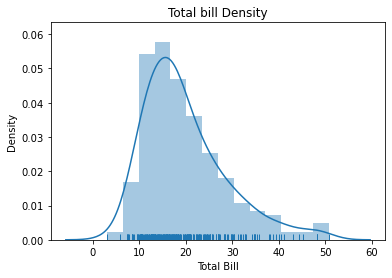

In [120]:
ax = sns.distplot(tips, x=tips['total_bill'], rug=True)
plt.title('Total bill Density')
plt.xlabel('Total Bill')
plt.ylabel('Density')
plt.show()

## seaborn Count 그래프

count 그래프, count 그래프는 이산값을 나타낸 그래프

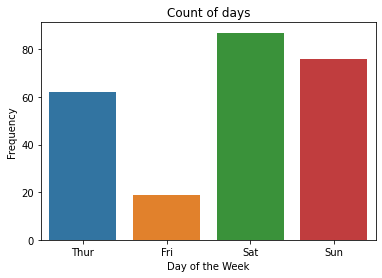

In [123]:
ax = sns.countplot(data=tips, x='day')
plt.title('Count of days')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.show()

# seaborn 이변량 그래프 그리기

seaborn 은 matplotlib 보다 다양한 방법으로 산점도를 그릴 수 있음  
regplot 매서드를 이용하면 산점도 그래프와 회귀선을 함께 그릴 수 있음  
회귀선을 그리지 않으려면 fit_rug 인자값을 False 로 지정하면 됨  

## regplot = 산점도 그래프 + 회귀선
[regplot seaborn 공식문서](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

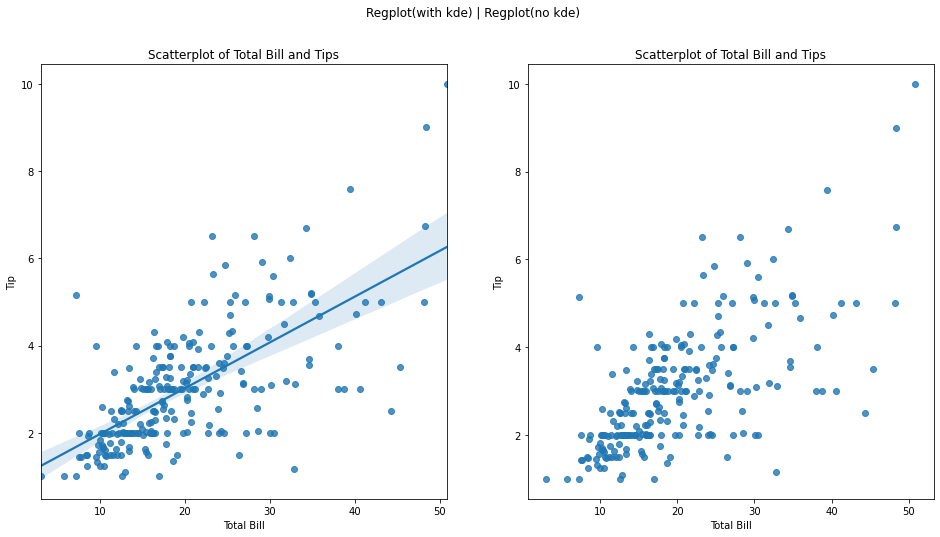

In [182]:
# 행=2,열=1 의 크기를 갖는 틀, 격자 생성, 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

# ax1 그래프 (fit_reg=True)
sns.regplot(data=tips, x='total_bill', y='tip', ax=ax1)
ax1.set(title='Scatterplot of Total Bill and Tips', xlabel='Total Bill', ylabel='Tip')

# ax2 그래프 (fit_reg=False)
sns.regplot(data=tips, x='total_bill', y='tip', ax=ax2, fit_reg=False)
ax2.set(title='Scatterplot of Total Bill and Tips', xlabel='Total Bill', ylabel='Tip')

# fit title
fig.suptitle('Regplot(with kde) | Regplot(no kde)')

plt.show()

## jointplot = 산점도 그래프 + 히스토그램
[jointplot seaborn 공식문서](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot)  
산점도 그래프와 히스토그램을 한번에 그려주는 그래프  
산점도 그래프는 점이 겹쳐보일 경우 점을 구분하기 어렵다는 단점이 있음  
구분하게 쉽게 그리려면 hex 그래프를 사용하면 됨, 특정 범위의 데이터가 많아지면 진한색으로 표현함  

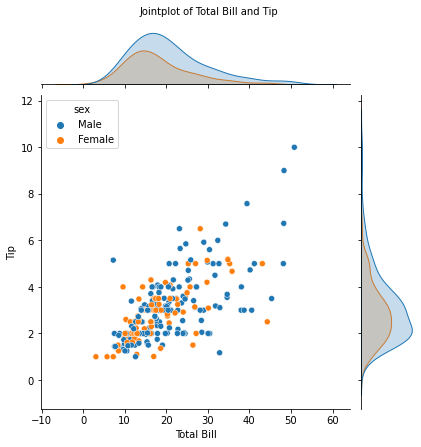

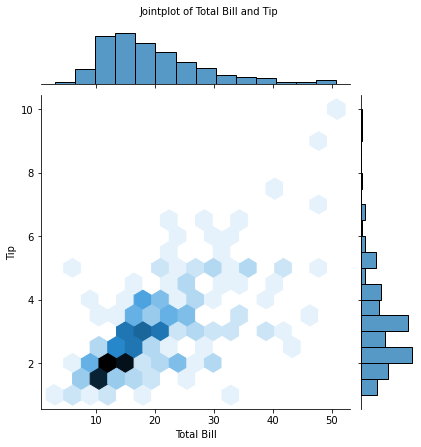

In [157]:
# hue 인자값으로 성별을 넣어 구분도 가능
joint = sns.jointplot(data=tips, x='total_bill', y='tip', hue='sex')
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Jointplot of Total Bill and Tip', fontsize=10, y=1.03)

joint2 = sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')
joint2.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint2.fig.suptitle('Jointplot of Total Bill and Tip', fontsize=10, y=1.03)

plt.show()

## kdeplot = 이차원 밀집도
이차원 밀집도는 kdeplot 매서드로 만들 수 있음  
[kdeplot seaborn 공식문서](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot)  

shade 인자값은 그래프에 음영효과를 줄 수 있는 옵션

/Users/coding_min/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1641: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


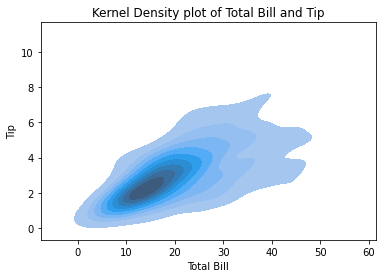

In [162]:
sns.kdeplot(data=tips['total_bill'], data2=tips['tip'], shade=True)
plt.title('Kernel Density plot of Total Bill and Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.show()

## barplot = 바 그래프
지정한 변수의 평균을 계산하여 그림 

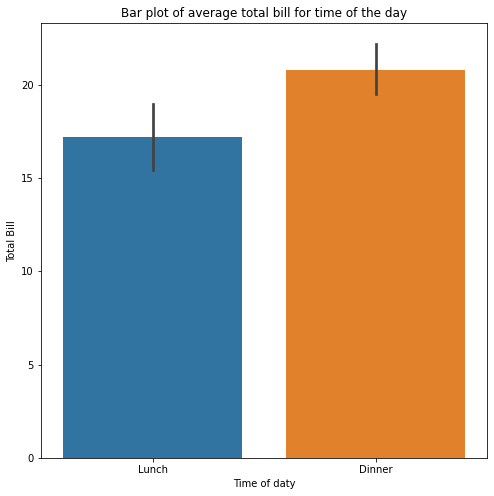

In [170]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))

sns.barplot(x='time', y='total_bill', data=tips, ax=ax1)

ax1.set(title='Bar plot of average total bill for time of the day',
       xlabel='Time of daty',
       ylabel='Total Bill')

plt.show()

## boxplot, violine = 박스, 바이올린 그래프 
box그래프는 최솟값, 4분위수, 최댓값, 이상치 등 다양한 통계량을 표현하는 그래프  
데이터 분산을 나타내는 커널 밀도를 추정하는 바이올린 그래프  
바이올린 그래프와 박스그래프의 중간에 해당하는 boxenplot 도 많이 사용됨.

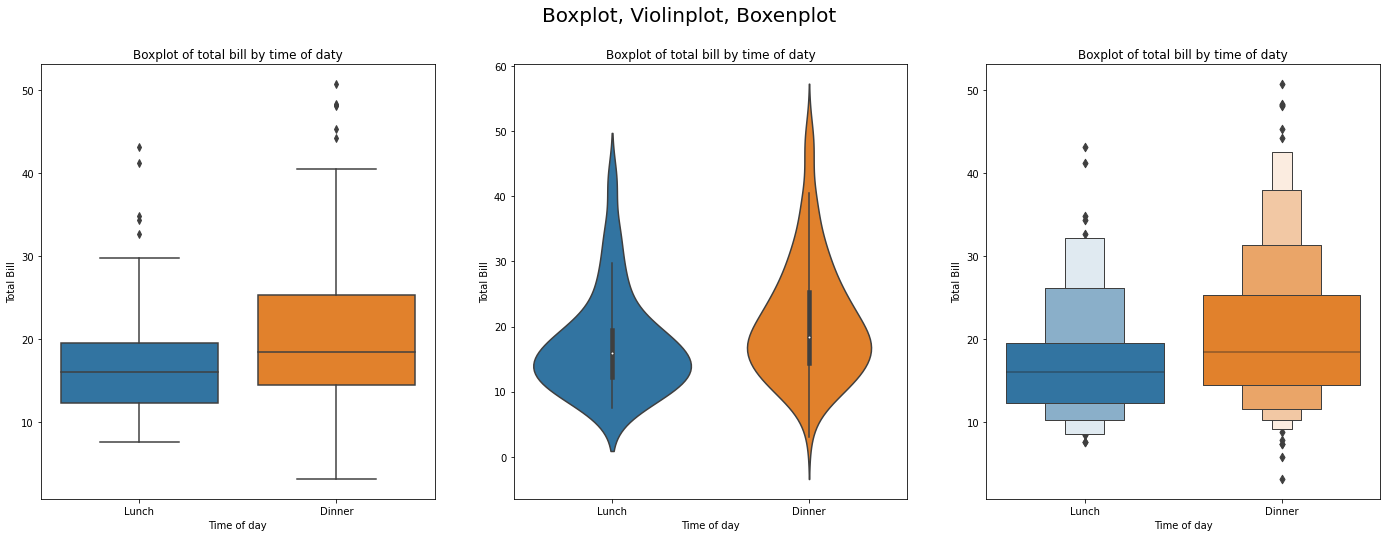

In [178]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

# boxplot
sns.boxplot(data=tips, x='time', y='total_bill', ax=ax1)
ax1.set_title('Boxplot of total bill by time of daty')
ax1.set_xlabel('Time of day')
ax1.set_ylabel('Total Bill')

# violinplot
sns.violinplot(data=tips, x='time', y='total_bill', ax=ax2)
ax2.set_title('Boxplot of total bill by time of daty')
ax2.set_xlabel('Time of day')
ax2.set_ylabel('Total Bill')

# boxenplot
sns.boxenplot(data=tips, x='time', y='total_bill', ax=ax3)
ax3.set_title('Boxplot of total bill by time of daty')
ax3.set_xlabel('Time of day')
ax3.set_ylabel('Total Bill')

fig.suptitle('Boxplot, Violinplot, Boxenplot', fontsize=20)

plt.show()

## pairplot, PariGrid = 관계그래프
관계그래프는 여러 그래프들을 포함하여 표현하는 그래프  
pairplot 그래프는 데이터프레임을 넣는 방식으로 매우 간단하게 그릴 수 있음

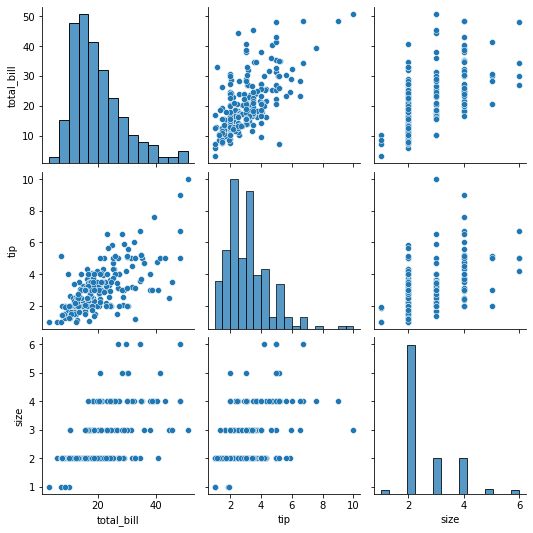

In [183]:
sns.pairplot(tips)

하지만 pairplot 은 대각선 아래방향으로 중복되는 그래프가 그려지게 된다는 단점이 있음  
이럴 경우 그려지는 위치를 지정하여 원하는 그래프로 교체할 수 있음

/Users/coding_min/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/coding_min/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/coding_min/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/User

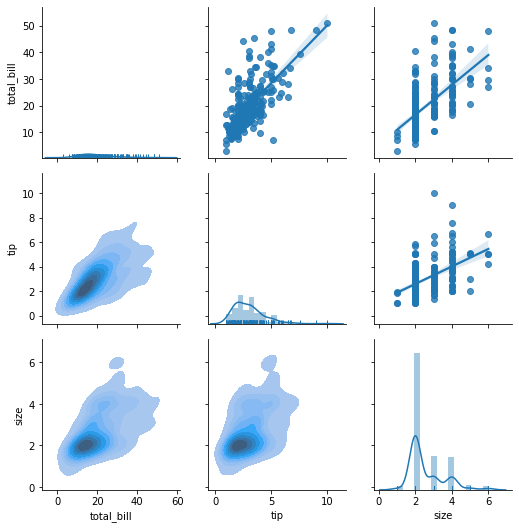

In [195]:
pairgrid = sns.PairGrid(tips)
pairgrid = pairgrid.map_upper(sns.regplot)
pairgrid = pairgrid.map_diag(sns.distplot, rug=True)
pairgrid = pairgrid.map_lower(sns.kdeplot, shade=True)

plt.show()

# seaborn 다변량 그래프 그리기

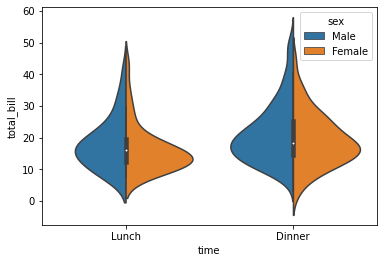

In [199]:
# 바이올린 그래프 hue 추가
fig, ax = plt.subplots()
ax = sns.violinplot(data=tips, x='time', y='total_bill', hue='sex', split=True)

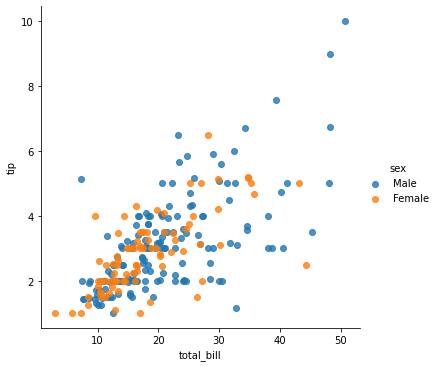

In [201]:
# 산점도, 관계 그래프 그리기
scatter = sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', fit_reg=False)

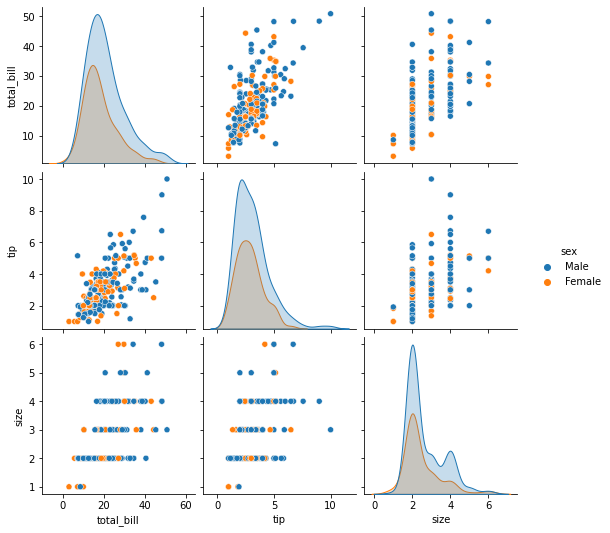

In [204]:
fig = sns.pairplot(tips, hue='sex')

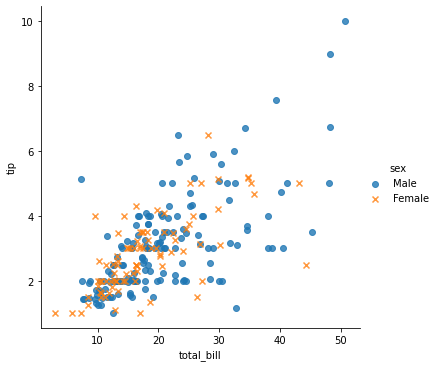

In [232]:
# 산점도 그래프의 크기와 모양 조절하기 
scatter = sns.lmplot(data=tips,
                     x='total_bill',
                     y='tip',
                     hue='sex',
                     fit_reg=False,
                     markers=['o', 'x']
                    )

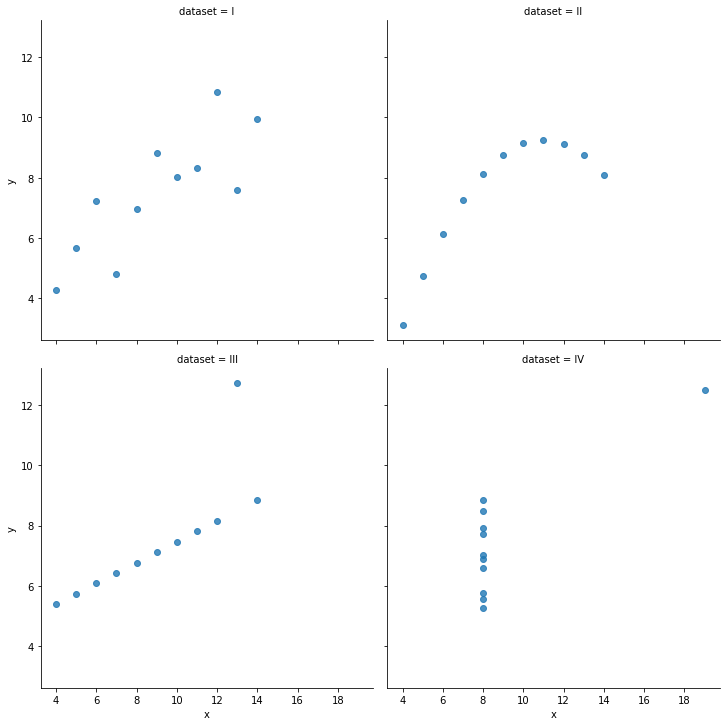

In [234]:
# lmplot 로 4개 데이터 그룹, 한번에 그래프 그리기
anscombe_plot = sns.lmplot(data=anscombe, x='x', y='y', fit_reg=False, col='dataset', col_wrap=2)

## FacetGrid 클래스로 그룹별 그래프

1. "데이터프레임", col="그룹을 구분지을 열 이름" 전달하여 객체 생성 -> map 메서드에 "그래프종류", "x축으로 지정할 열이름"

/Users/coding_min/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/coding_min/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/coding_min/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/User

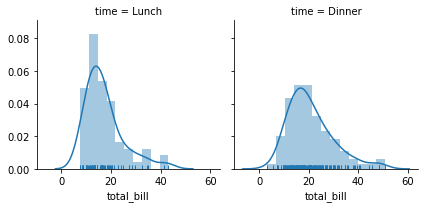

In [242]:
facet = sns.FacetGrid(tips, col='time')
facet = facet.map(sns.distplot, 'total_bill', rug=True)

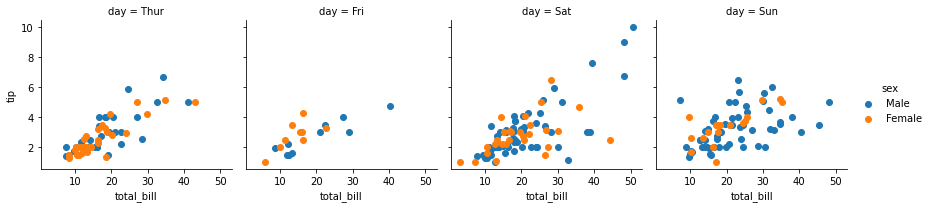

In [244]:
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

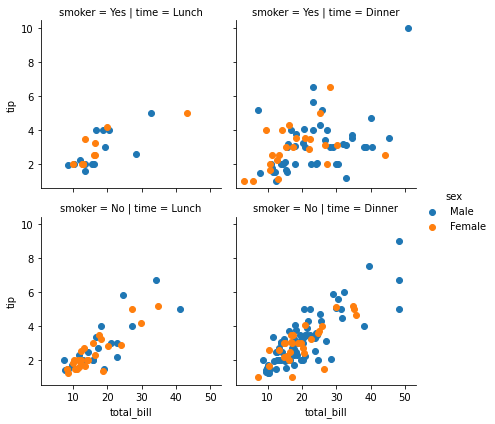

In [247]:
# 더 많은 변수를 사용하여 그래프, col, row의 인잣값에 따라 그래프를 구분
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()


# 데이터프레임과 시리즈로 그래프 그리기

시리즈에 있는 plot 속성에 hist메서드를 사용하면 쉽게 히스토그램을 그릴 수 있음

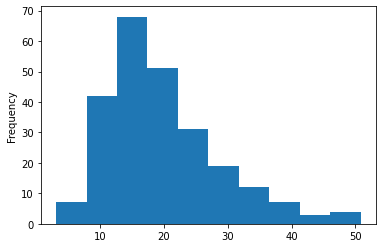

In [249]:
ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

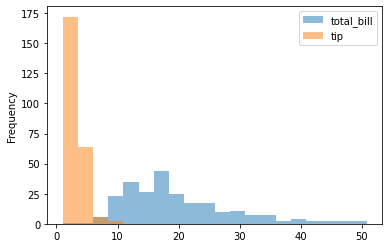

In [250]:
fig, ax = plt.subplots()
tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax)

밀집도, 산점도, 육각 그래프는 kde, scatter, hexbin 메서드를 사용하여 그릴 수 있음  
hexbin 은 gridsize= 인자를 통해 육각형의 크기가 변경 가능함

<AxesSubplot:>

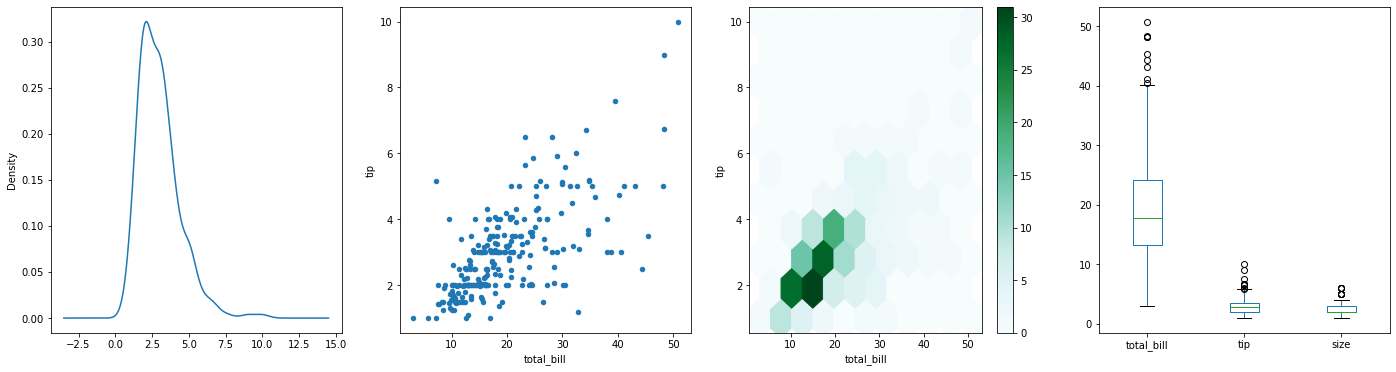

In [257]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))
tips['tip'].plot.kde(ax=ax1)
tips.plot.scatter(x='total_bill', y='tip', ax=ax2)
tips.plot.hexbin(x='total_bill', y='tip', ax=ax3, gridsize=10)
tips.plot.box(ax=ax4)

# seaborn 라이브러리로 그래프 스타일 지정

그래프의 스타일은 set_style 메서드를 사용하여 변경할 수 있음  
set_style 는 스타일을 적용할 부분에서 한 번만 실행하면 됨  

<AxesSubplot:xlabel='time', ylabel='total_bill'>

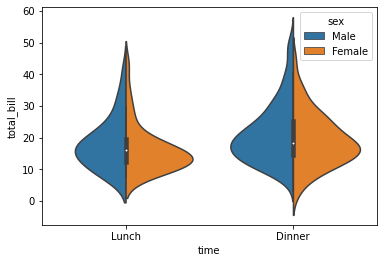

In [258]:
fig, ax = plt.subplots(1, 1)
sns.violinplot(data=tips, x='time', y='total_bill', hue='sex', split=True)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

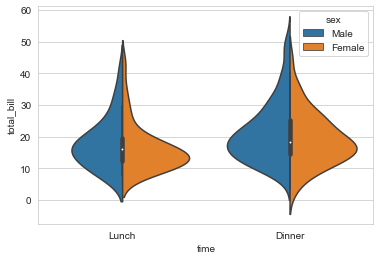

In [261]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)
sns.violinplot(data=tips, x='time', y='total_bill', hue='sex', split=True)

기본적으로 제공하는 그래프 스타일은 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'

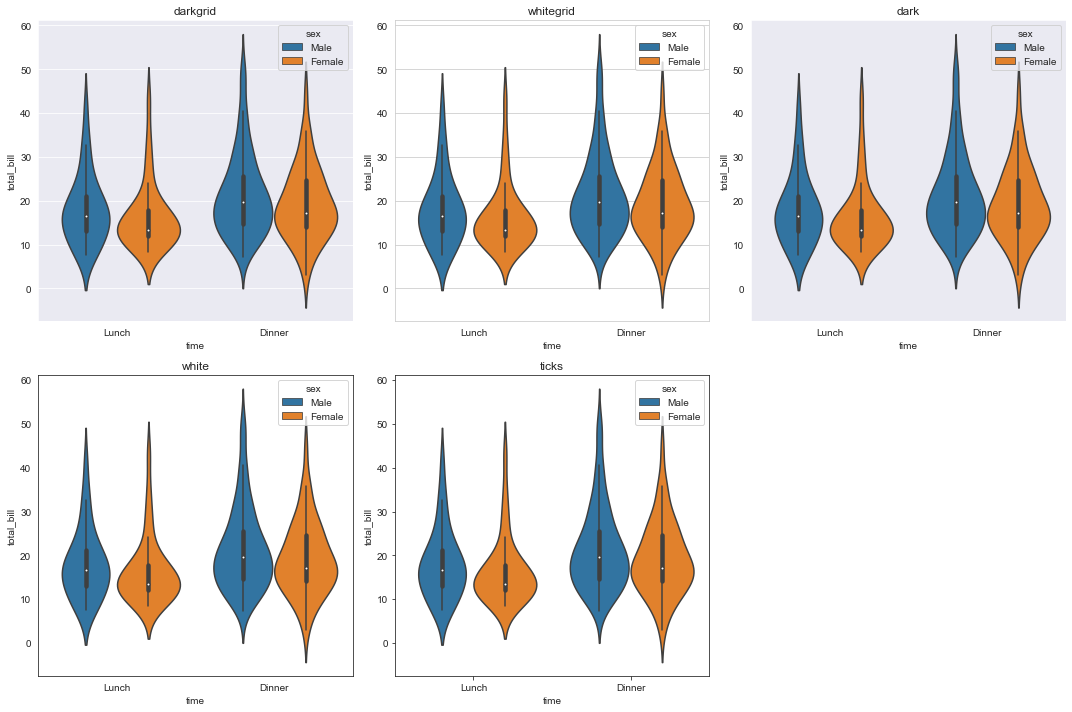

In [264]:
fig = plt.figure(figsize=(15, 10))

seaborn_style = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

for idx, style in enumerate(seaborn_style):
    plot_pos = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_pos)
        violine = sns.violinplot(x='time', y='total_bill', data=tips, hue='sex')
        violine.set_title(style)
        
fig.tight_layout()